Sample CSV files created successfully!

Processed data1.csv:
salary: 50000.0
age: 35.0

Processed data2.csv:
salary: 48000.0
age: 34.2


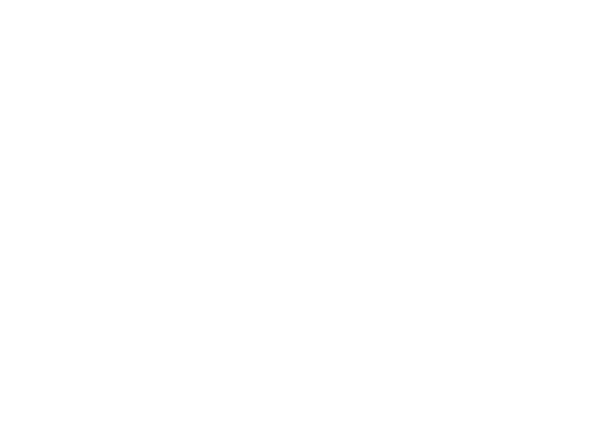

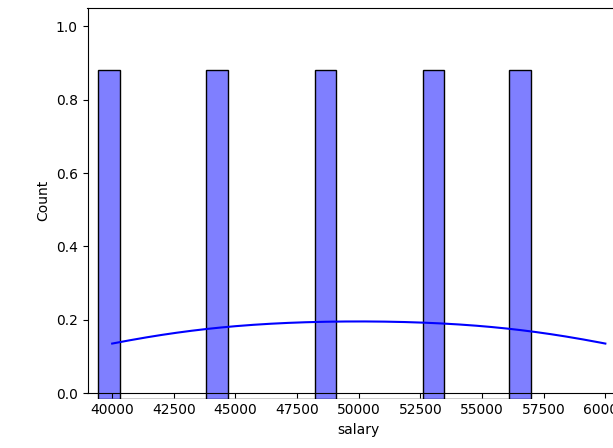

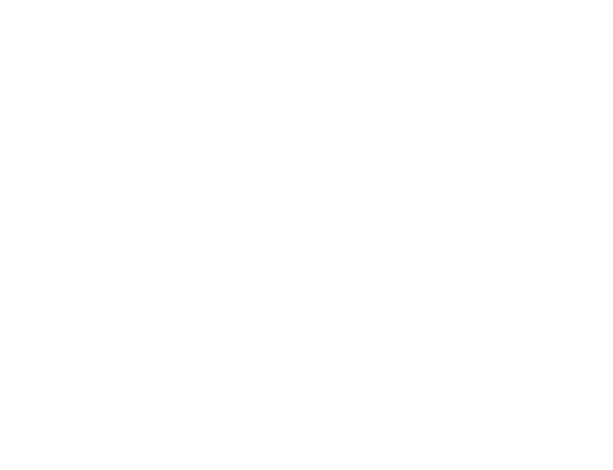

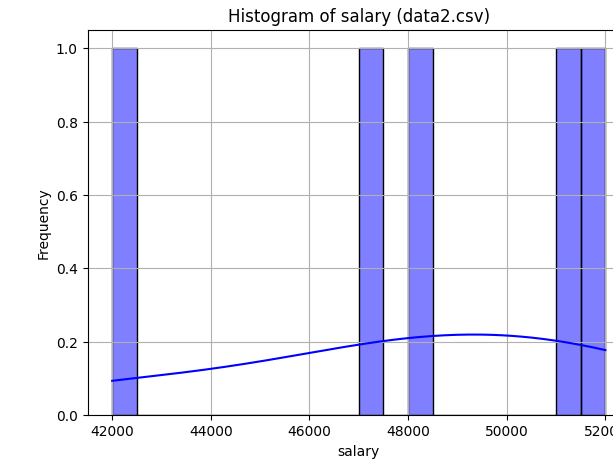

In [4]:
import pandas as pd
import threading
import logging
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Configure logging
logging.basicConfig(filename="parallel_processing.log", level=logging.INFO, format="%(asctime)s - %(message)s")

# Function to generate sample CSV files
def create_sample_data():
    data1 = {
        "salary": [40000, 50000, 60000, 55000, 45000],
        "age": [25, 35, 45, 30, 40]
    }
    df1 = pd.DataFrame(data1)
    df1.to_csv("data1.csv", index=False)

    data2 = {
        "salary": [42000, 48000, 52000, 51000, 47000],
        "age": [26, 34, 42, 31, 38]
    }
    df2 = pd.DataFrame(data2)
    df2.to_csv("data2.csv", index=False)

    print("Sample CSV files created successfully!")

# Function to process a dataset
def process_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        
        # Compute mean of numerical columns
        means = df.mean(numeric_only=True).to_dict()
        
        # Log the computed means
        log_entry = f"{datetime.now()} - Processed {file_path}: {means}"
        logging.info(log_entry)
        
        # Print summary statistics
        print(f"\nProcessed {file_path}:")
        for key, value in means.items():
            print(f"{key}: {round(value, 2)}")

        # Plot histogram for the first numerical column
        num_cols = df.select_dtypes(include=['number']).columns
        if not num_cols.empty:
            column = num_cols[0]  # Select first numeric column
            plt.figure(figsize=(7, 5))
            sns.histplot(df[column], bins=20, kde=True, color="blue")
            plt.title(f"Histogram of {column} ({file_path})")
            plt.xlabel(column)
            plt.ylabel("Frequency")
            plt.grid(True)
            plt.show()
            logging.info(f"Generated histogram for {column} in {file_path}")

    except Exception as e:
        logging.error(f"Error processing {file_path}: {e}")
        print(f"Error processing {file_path}: {e}")

# Create sample data files
create_sample_data()

# File paths
file1 = "data1.csv"
file2 = "data2.csv"

# Create and start threads for parallel processing
thread1 = threading.Thread(target=process_dataset, args=(file1,))
thread2 = threading.Thread(target=process_dataset, args=(file2,))

thread1.start()
thread2.start()

thread1.join()
thread2.join()
